In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
#function to plot graphs
def seaborn_plot(data, title=None, xlabel=None, ylabel=None, rotation=0,custom_xticks=False):
    sns.set(rc={'figure.figsize':(30,12)})
    ax = sns.lineplot(data=data)
    ax.set_title(title, fontsize=25, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)
    if custom_xticks == True:
        plt.xticks(np.arange(0, len(data.index), 3.0))
    else:
        pass
    plt.xticks(rotation=rotation, fontsize=18)
    plt.yticks(fontsize=18)
    return ax

In [3]:
path = r"C:\Users\yudhi\OneDrive\Desktop\School\Courses\Data_Mining\Data"
os.chdir(path)

In [4]:
df_year = pd.read_csv('df_year.csv', index_col=0, parse_dates=True)
df_year.head()

,count
YearFirst,
1976-01-01,59
1977-01-01,75
1978-01-01,86
1979-01-01,77
1980-01-01,82


<AxesSubplot:>

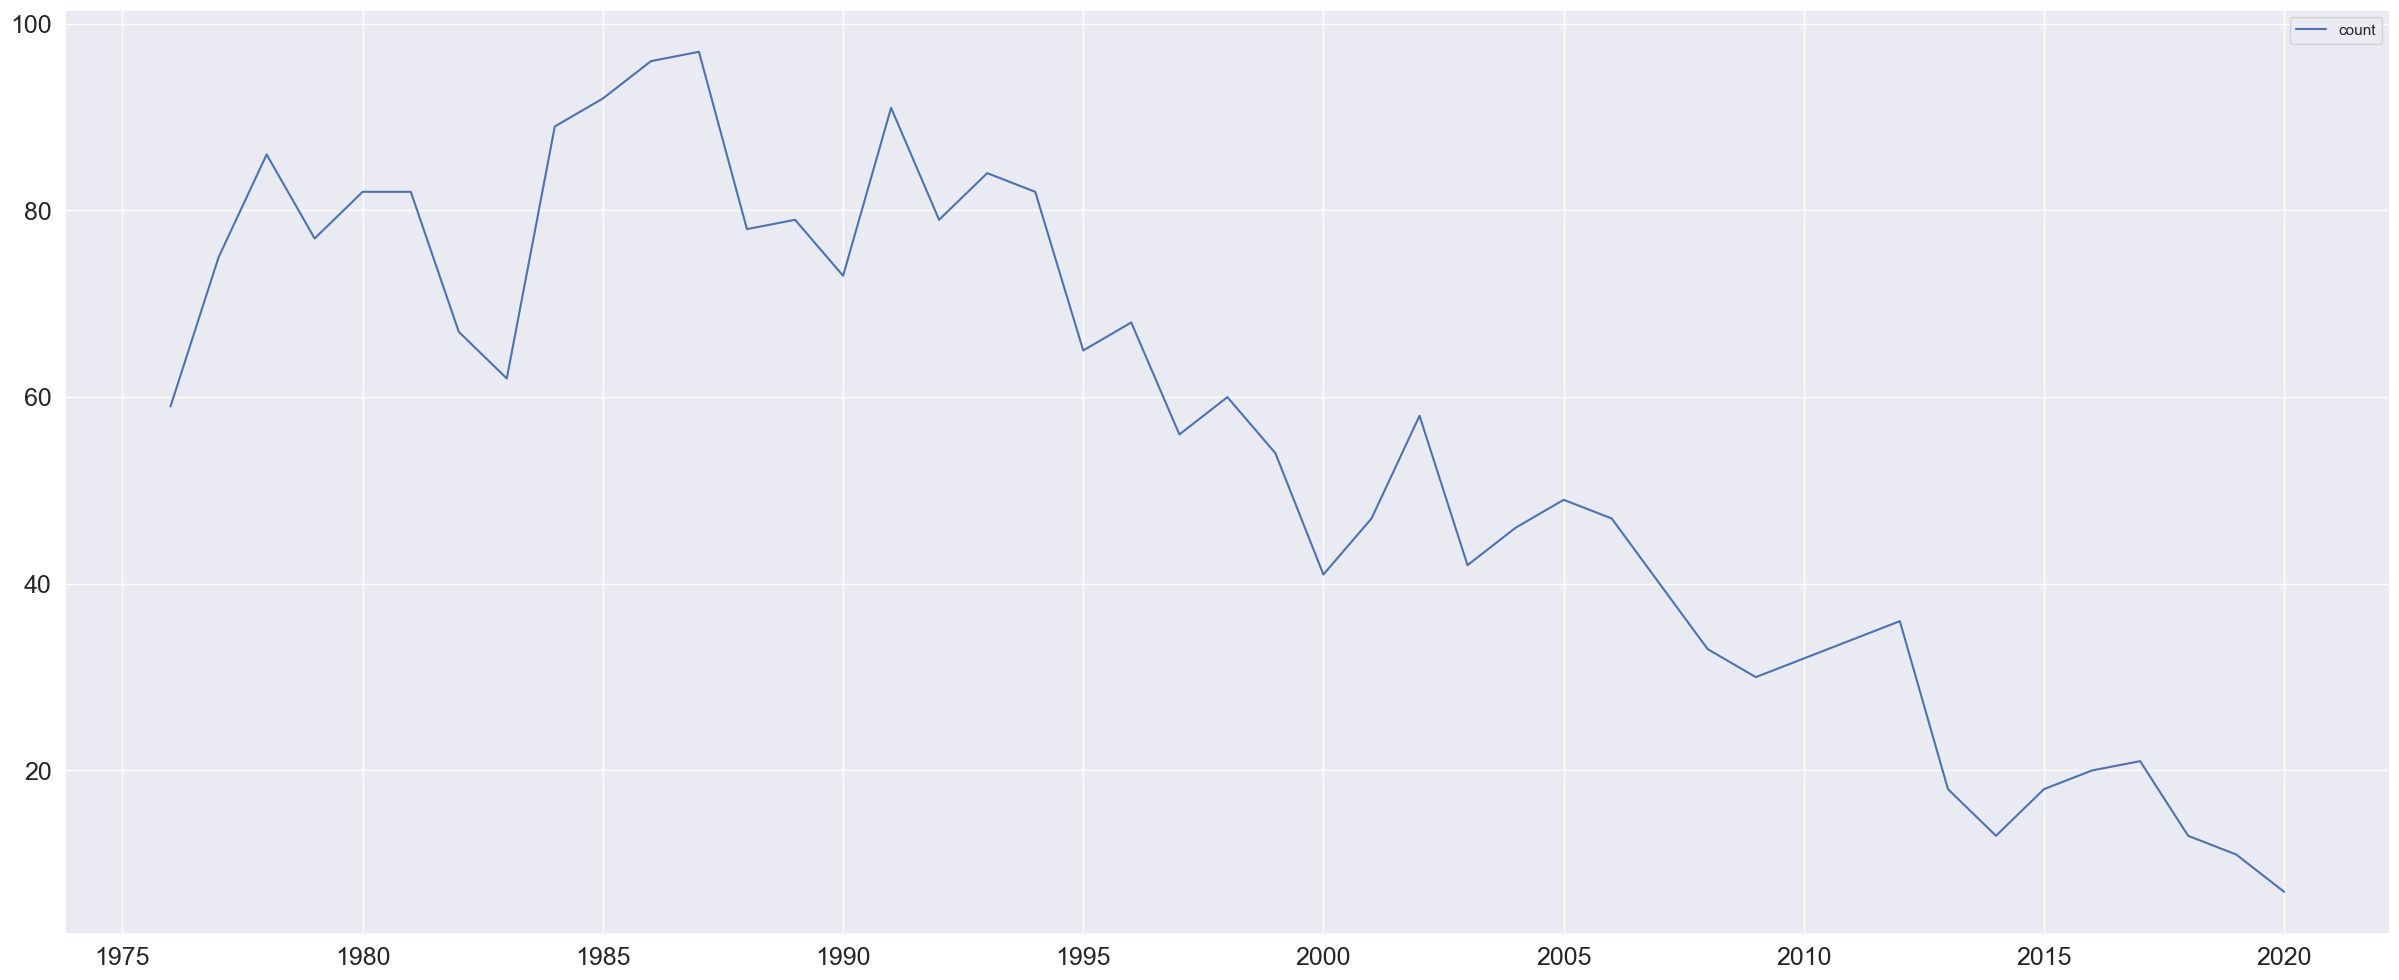

In [5]:
seaborn_plot(df_year)

In [6]:
df_stats = pd.read_excel('Stats_Killer.xlsx', index_col=0, parse_dates=True)
df_stats.head()

,Serial_Killing_Incidents,INFLATION,Mass_Shooting_Incidents
Year,,,
1976-01-01,7.700000,6.5,1
1977-01-01,7.050000,6.3,3
1978-01-01,6.066667,7.4,1
1979-01-01,5.850000,9.8,0
1980-01-01,7.175000,12.4,3


<AxesSubplot:>

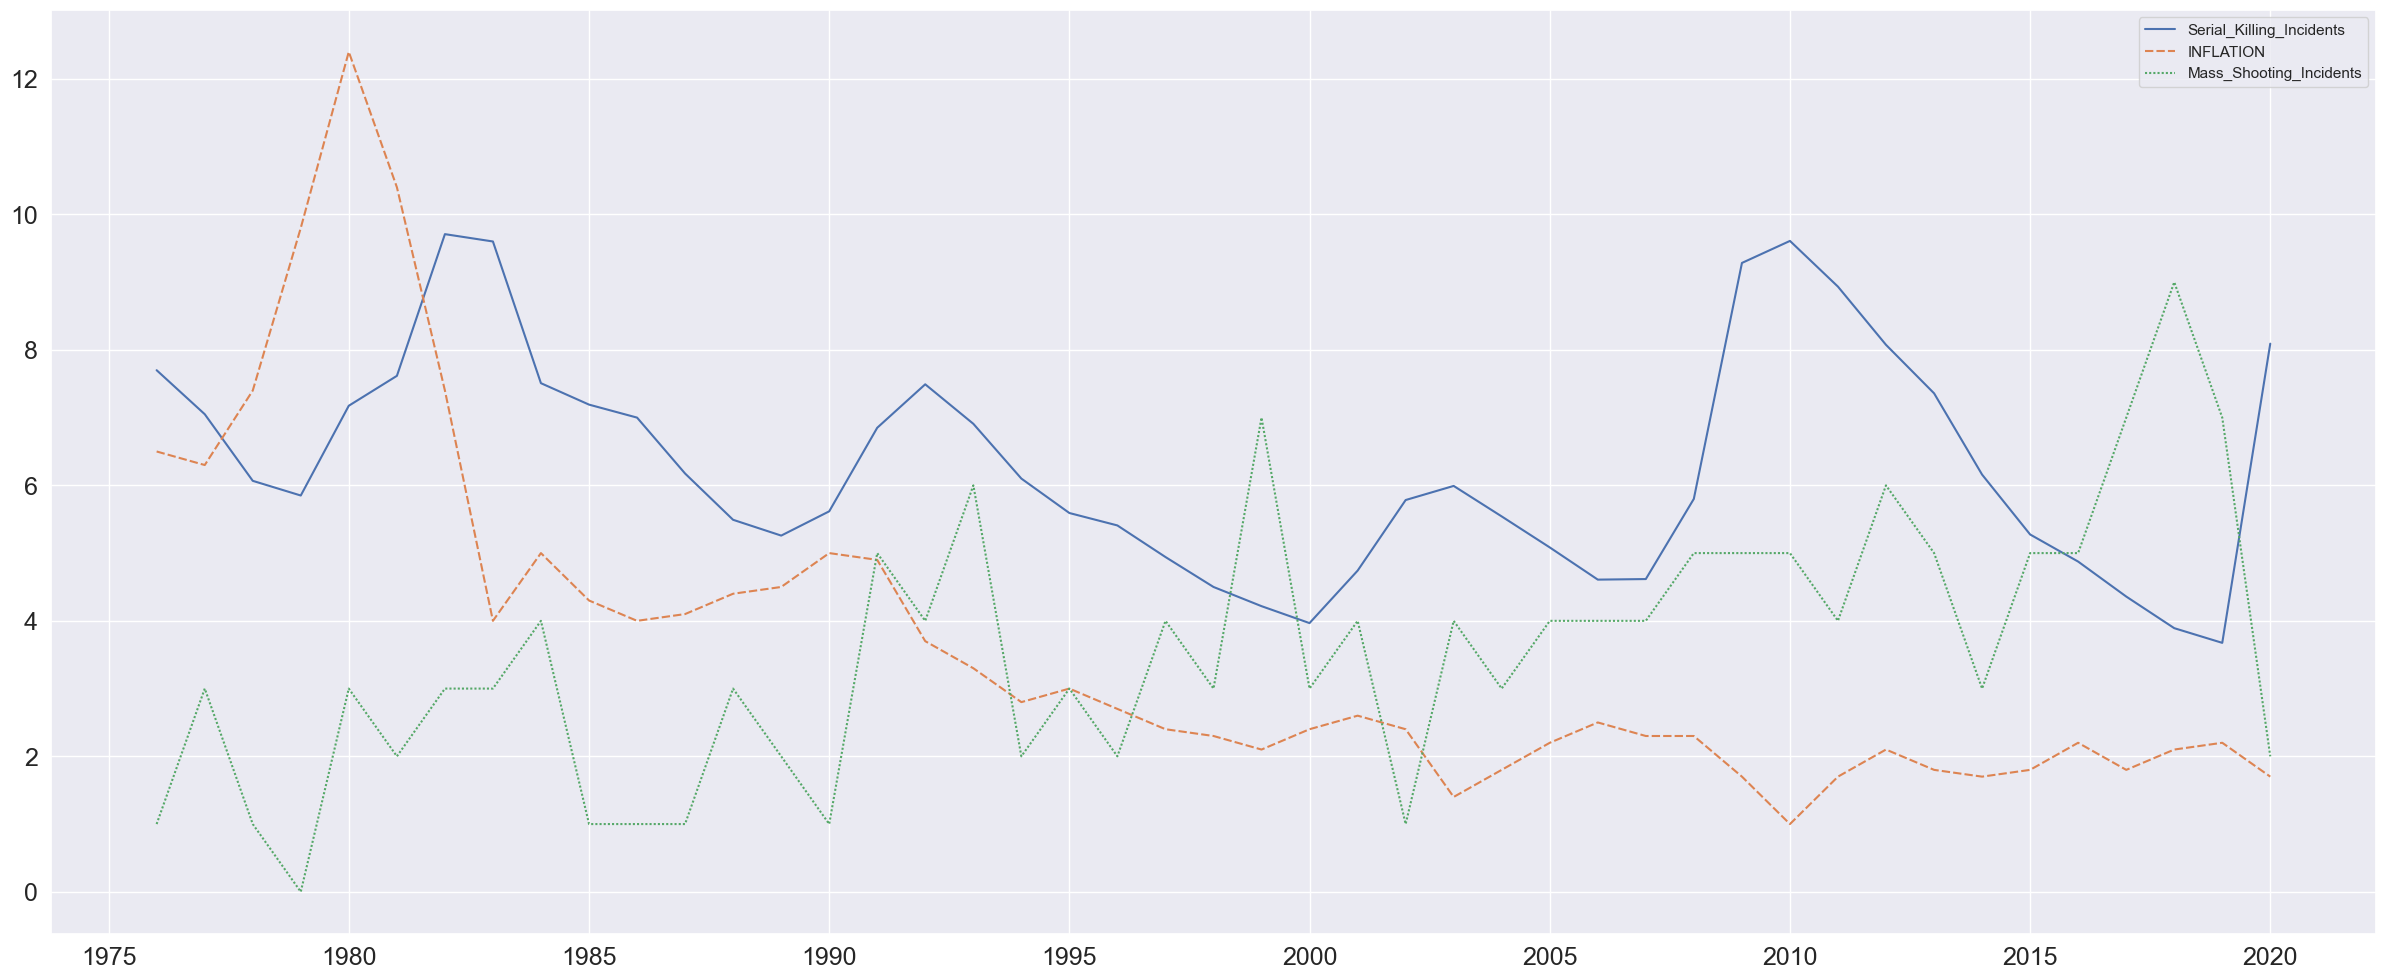

In [7]:
seaborn_plot(df_stats)

In [8]:
df_merge = pd.merge(df_year, df_stats, left_index=True, right_index=True)
df_merge.head()

,count,Serial_Killing_Incidents,INFLATION,Mass_Shooting_Incidents
YearFirst,,,,
1976-01-01,59,7.700000,6.5,1
1977-01-01,75,7.050000,6.3,3
1978-01-01,86,6.066667,7.4,1
1979-01-01,77,5.850000,9.8,0
1980-01-01,82,7.175000,12.4,3


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_merge)
array = scaler.transform(df_merge)
columns = ['Serial_Killing_Incidents', 'Unemployment', 'Inflation', 'Mass_Shooting_Incidents']
# creating the dataframe
df = pd.DataFrame(data = array, 
                  index = df_merge.index, 
                  columns = columns)
df.head()

,Serial_Killing_Incidents,Unemployment,Inflation,Mass_Shooting_Incidents
YearFirst,,,,
1976-01-01,0.577778,0.667127,0.482456,0.111111
1977-01-01,0.755556,0.559392,0.464912,0.333333
1978-01-01,0.877778,0.396409,0.561404,0.111111
1979-01-01,0.777778,0.360497,0.771930,0.000000
1980-01-01,0.833333,0.580110,1.000000,0.333333


In [10]:
df_diff = df.diff()[1:]
df_diff.head()

,Serial_Killing_Incidents,Unemployment,Inflation,Mass_Shooting_Incidents
YearFirst,,,,
1977-01-01,0.177778,-0.107735,-0.017544,0.222222
1978-01-01,0.122222,-0.162983,0.096491,-0.222222
1979-01-01,-0.100000,-0.035912,0.210526,-0.111111
1980-01-01,0.055556,0.219613,0.228070,0.333333
1981-01-01,0.000000,0.073204,-0.175439,-0.111111


<AxesSubplot:>

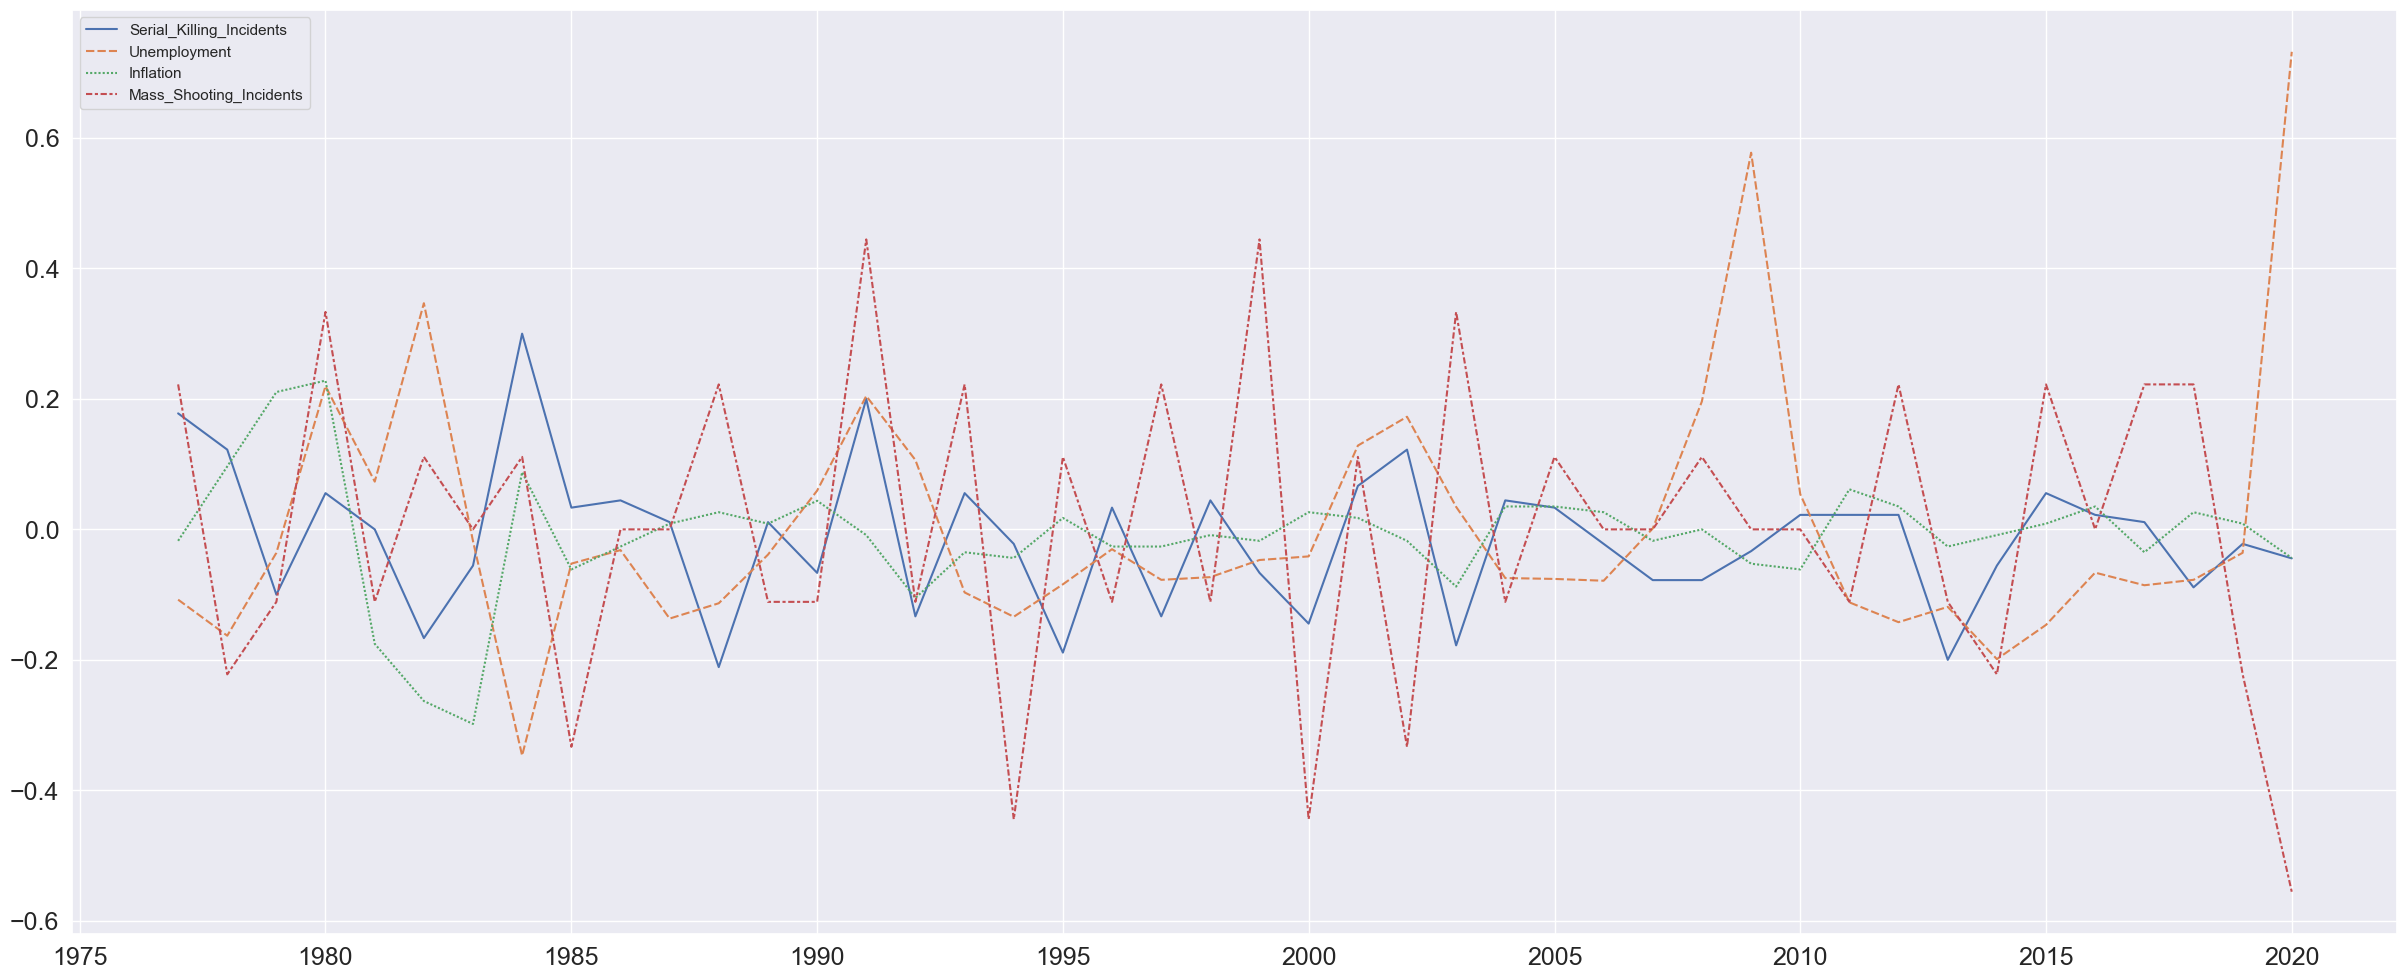

In [11]:
seaborn_plot(df_diff)

<AxesSubplot:title={'center':'How Inflation and Unemployment affects the rate of serial killer crime'}, xlabel='Year', ylabel='Scaled(Count)'>

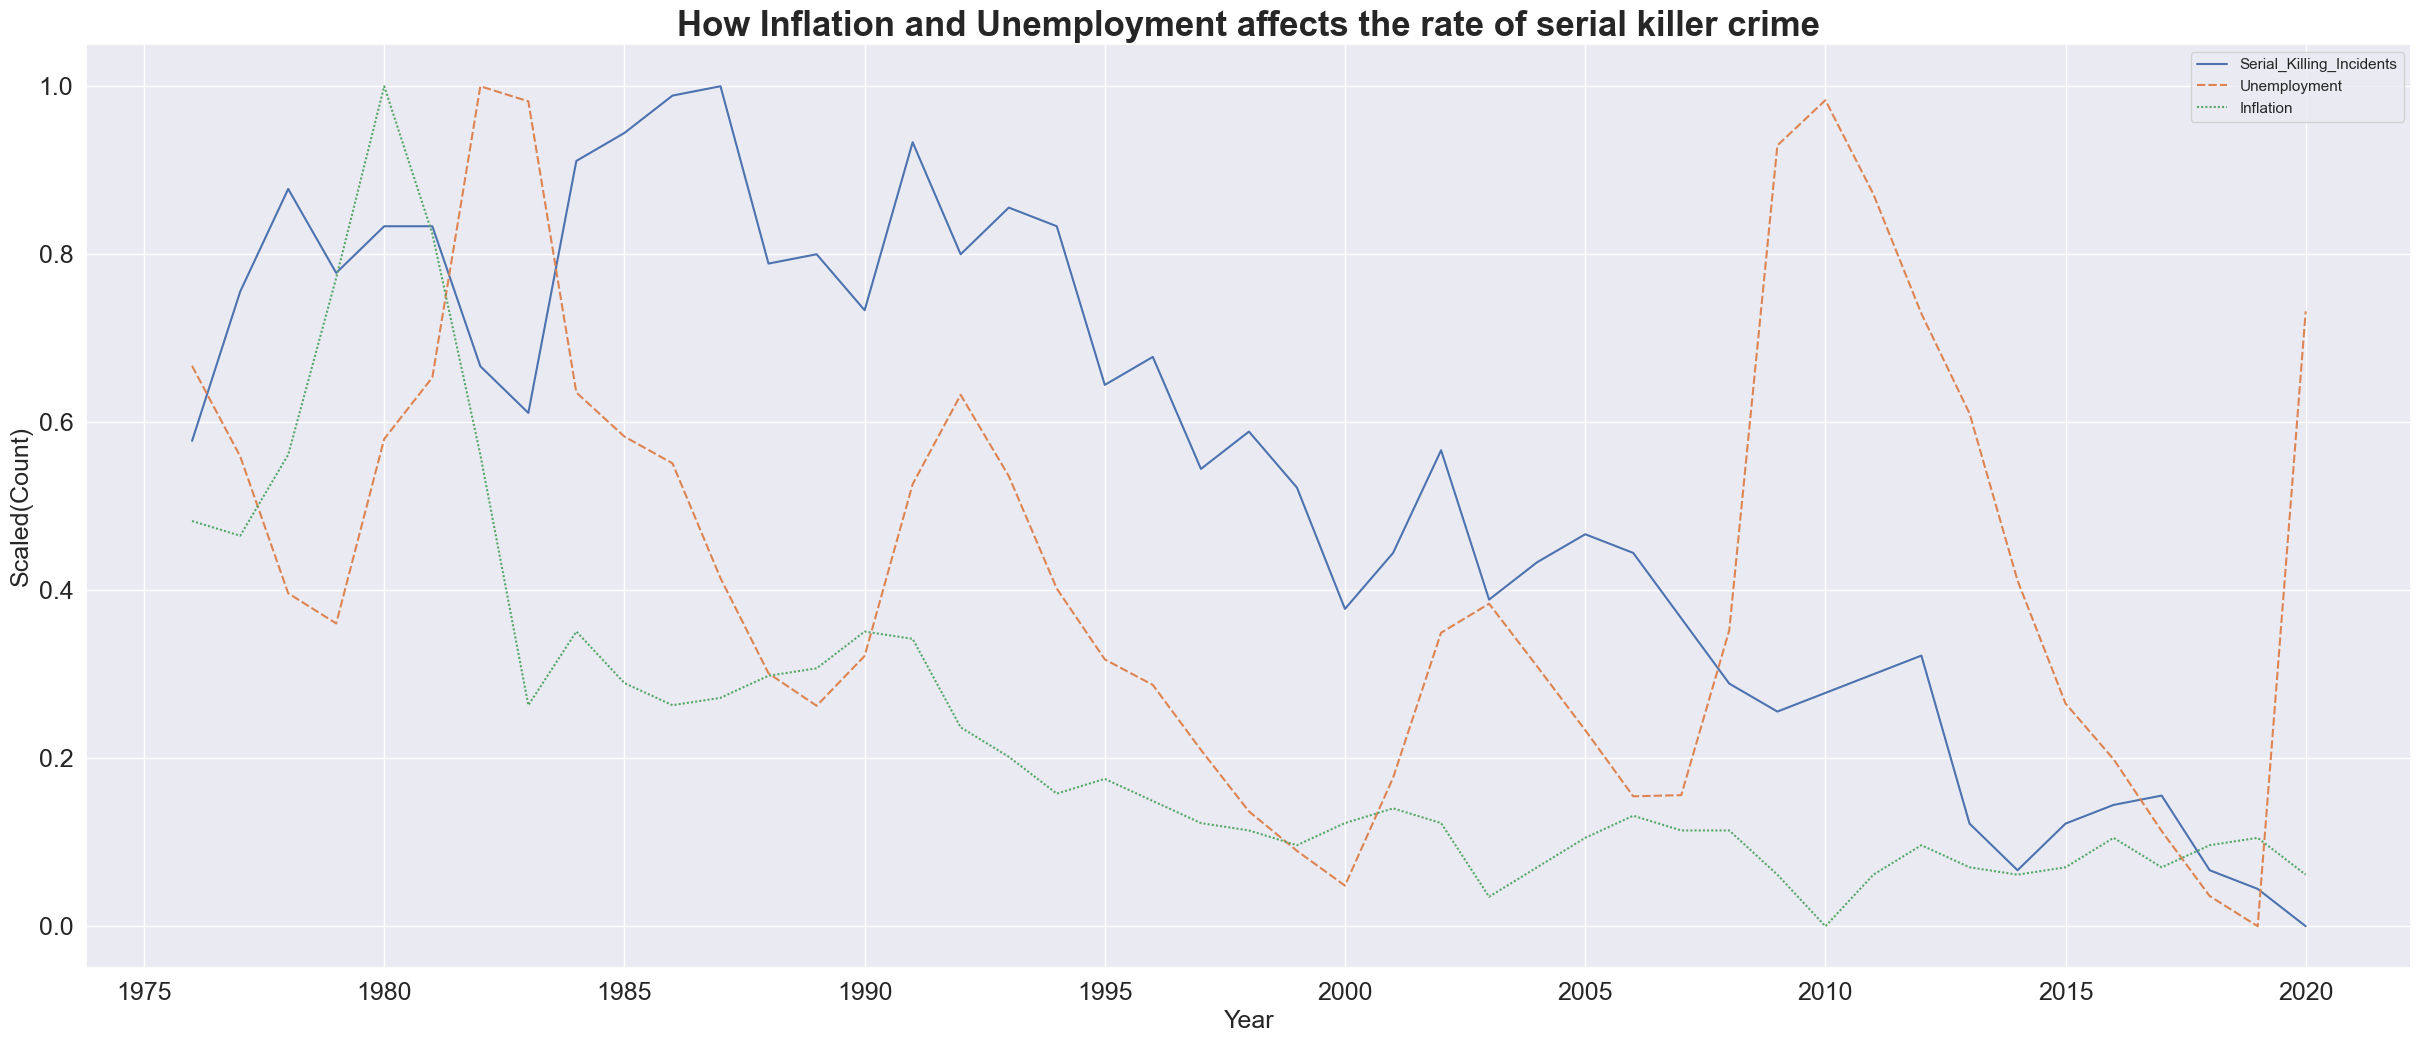

In [12]:
seaborn_plot(df[['Serial_Killing_Incidents', 'Unemployment', 'Inflation']], xlabel='Year', ylabel='Scaled(Count)', title='How Inflation and Unemployment affects the rate of serial killer crime')

In [13]:
from statsmodels.tsa.stattools import grangercausalitytests
cols = ['Serial_Killing_Incidents', 'Unemployment']
granger_result = grangercausalitytests(df_diff[cols], maxlag=10)
#Notice that till lag 10 our p-value is not significant. 
#We fail to reject our null-hupothesis and conclude that the lagged values of time-series CANNOT be used to forecast time-series Count.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0019  , p=0.9659  , df_denom=40, df_num=1
ssr based chi2 test:   chi2=0.0020  , p=0.9644  , df=1
likelihood ratio test: chi2=0.0020  , p=0.9644  , df=1
parameter F test:         F=0.0019  , p=0.9659  , df_denom=40, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6141  , p=0.5466  , df_denom=37, df_num=2
ssr based chi2 test:   chi2=1.3941  , p=0.4981  , df=2
likelihood ratio test: chi2=1.3714  , p=0.5037  , df=2
parameter F test:         F=0.6141  , p=0.5466  , df_denom=37, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3754  , p=0.7713  , df_denom=34, df_num=3
ssr based chi2 test:   chi2=1.3580  , p=0.7154  , df=3
likelihood ratio test: chi2=1.3360  , p=0.7206  , df=3
parameter F test:         F=0.3754  , p=0.7713  , df_denom=34, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4359  , p=0.7816  , df_d

In [14]:
cols = ['Serial_Killing_Incidents', 'Inflation']
granger_result = grangercausalitytests(df_diff[cols], maxlag=10)
# At lag 2 and 5 , our p-value is significant.
#We can then reject our null-hupothesis and conclude that the lagged values of time-series can be used to forecast time-series Count.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1283  , p=0.7221  , df_denom=40, df_num=1
ssr based chi2 test:   chi2=0.1379  , p=0.7104  , df=1
likelihood ratio test: chi2=0.1377  , p=0.7106  , df=1
parameter F test:         F=0.1283  , p=0.7221  , df_denom=40, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1526  , p=0.0544  , df_denom=37, df_num=2
ssr based chi2 test:   chi2=7.1572  , p=0.0279  , df=2
likelihood ratio test: chi2=6.6088  , p=0.0367  , df=2
parameter F test:         F=3.1526  , p=0.0544  , df_denom=37, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6237  , p=0.0663  , df_denom=34, df_num=3
ssr based chi2 test:   chi2=9.4916  , p=0.0234  , df=3
likelihood ratio test: chi2=8.5376  , p=0.0361  , df=3
parameter F test:         F=2.6237  , p=0.0663  , df_denom=34, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7041  , p=0.1742  , df_d

<AxesSubplot:title={'center':'Serial Killings vs Mass Public Shootings in the United States'}, xlabel='Year', ylabel='Scaled Frequency'>

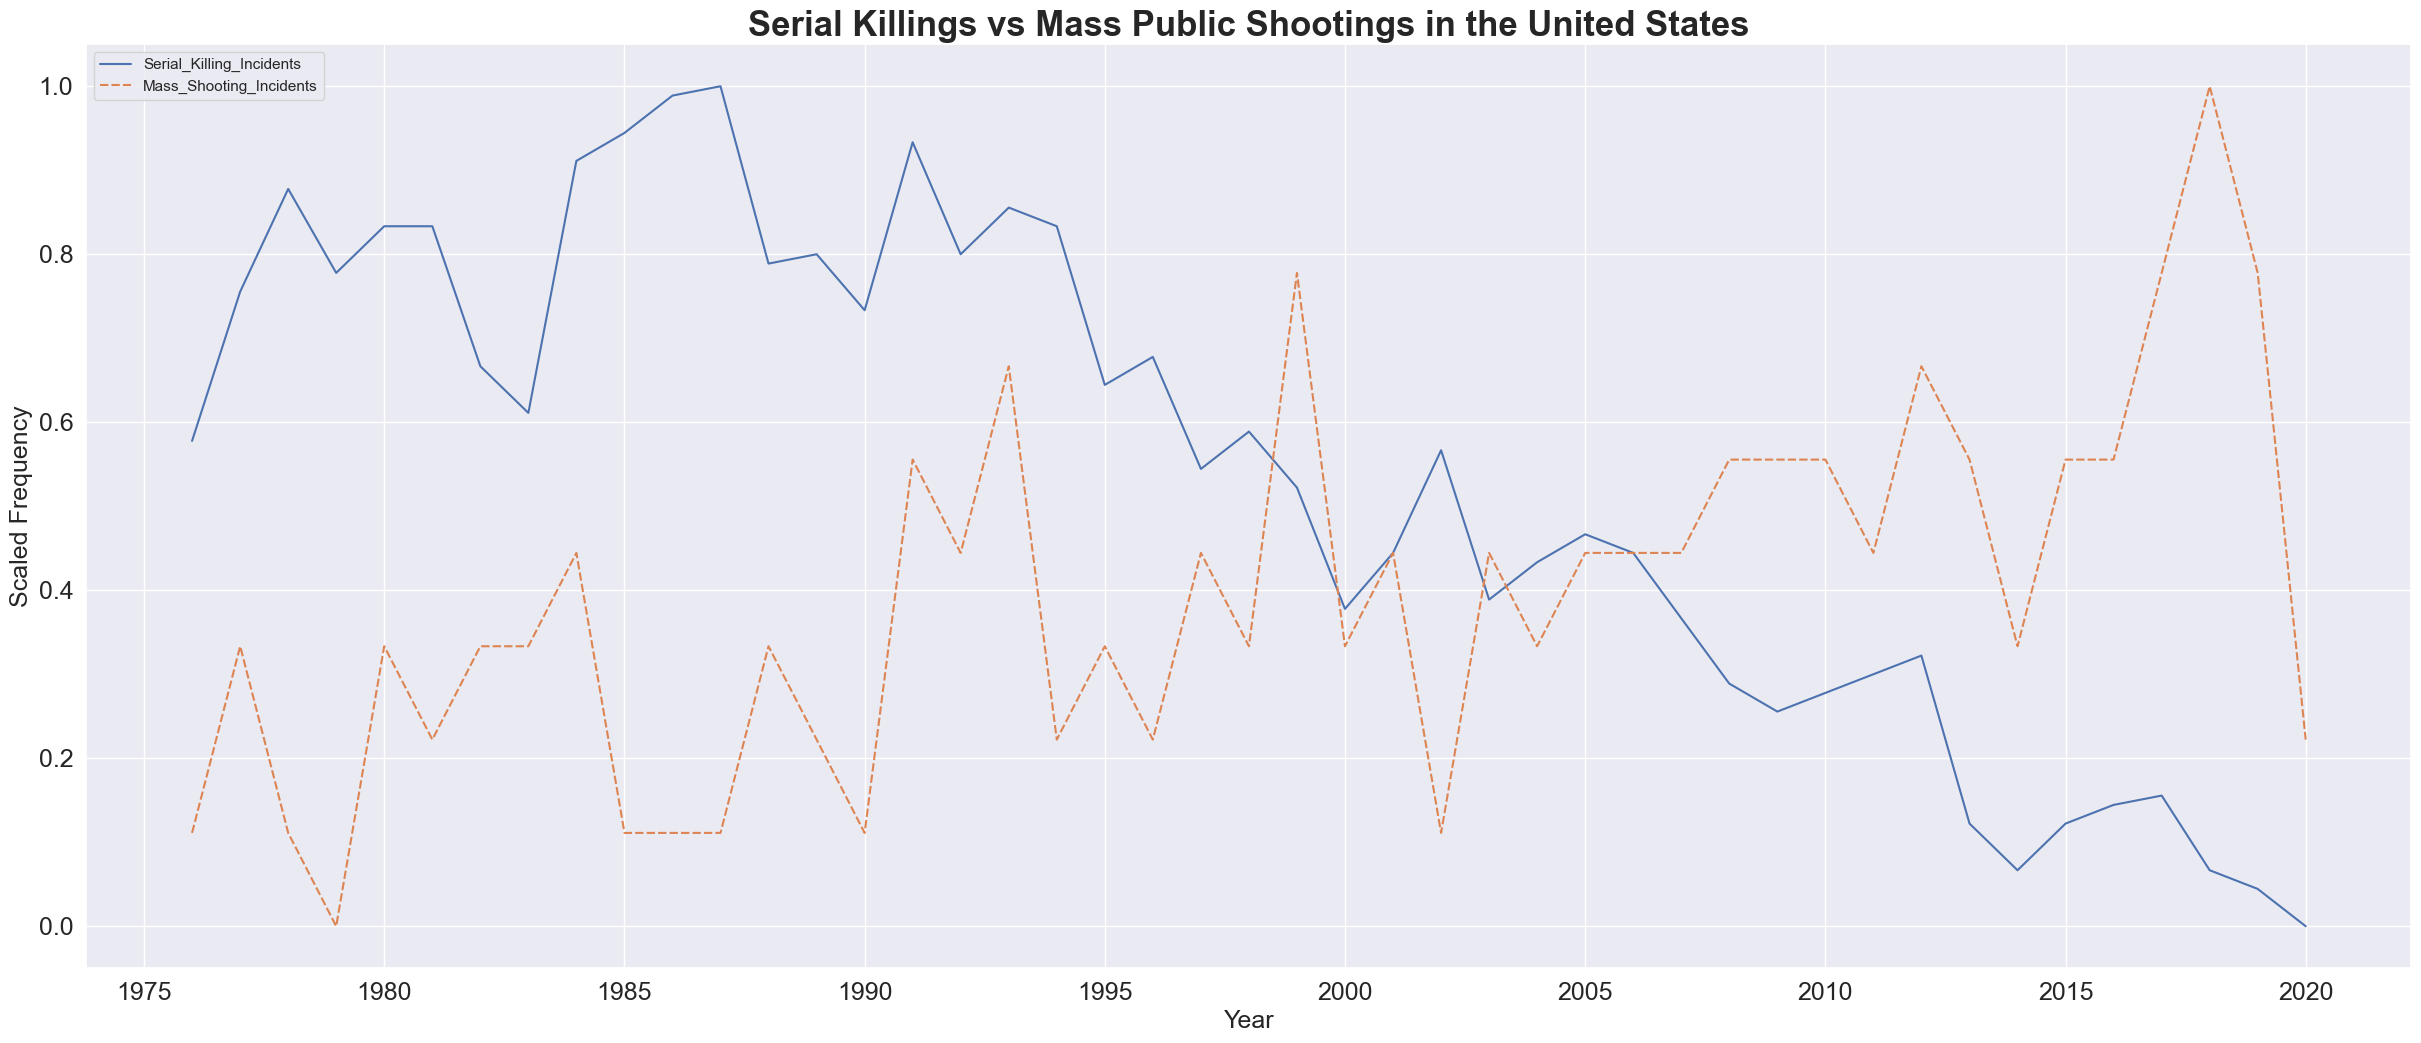

In [16]:
seaborn_plot(df[['Serial_Killing_Incidents', 'Mass_Shooting_Incidents']], xlabel='Year', ylabel='Scaled Frequency', title='Serial Killings vs Mass Public Shootings in the United States')